In [ ]:
# The goal is to reimplement Faster R-CNN using TensorFlow.

# Steps:
# 1. Create the convolutional layers, by taking a model pretrained on ImageNet and use Transfer Learning.

# Resources:
# https://www.tensorflow.org/tutorials/images/transfer_learning
# https://arxiv.org/pdf/1506.01497.pdf
# https://www.youtube.com/watch?v=nDPWywWRIRo

In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.patches as patches
tf.compat.v1.enable_eager_execution()

In [73]:
# TODO Should I filter out only the "traffic" categories? ex: cars, bikes, person
dataset = tfds.load(name="voc", split=tfds.Split.TRAIN)

classes = [ 'Aeroplane', 'Bicycle', 'Bird', 'Boat', 'Bottle', 
            'Bus', 'Car', 'Cat', 'Chair', 'Cow', 
            'Diningtable', 'Dog', 'Horse', 'Motorbike', 'Person', 
            'Pottedplant', 'Sheep', 'Sofa', 'Train', 'Tvmonitor']

In [4]:
dataset_length = [i for i,_ in enumerate(dataset)][-1] + 1
dataset_length

2501

In [5]:
dataset.shuffle(buffer_size=2501)
train = dataset.take(2000)
validation = dataset.skip(2000).take(250)
testing = dataset.skip(2250).take(250)

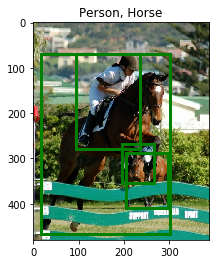

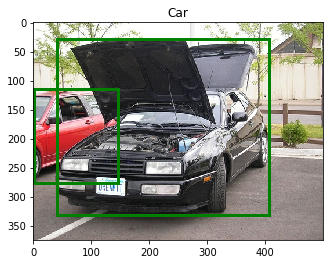

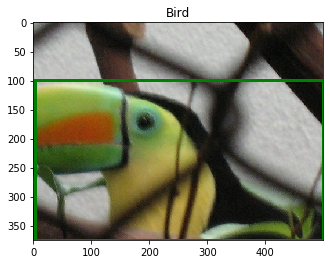

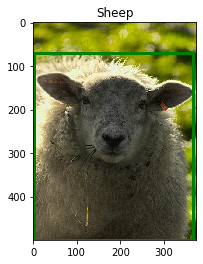

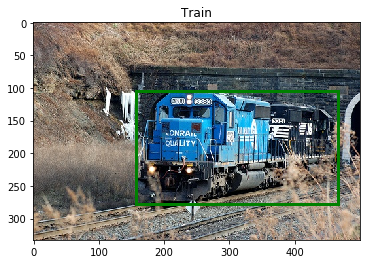

In [87]:
for row in train.take(5):    
    _, ax = plt.subplots(1) # Create figure and axes
    image = row['image'].numpy().astype(float) / 255
    height, width, _ = image.shape
    ax.imshow(image)
    
    labels = set()
    for bbox, label in zip(row['objects']['bbox'].numpy(), row['objects']['label'].numpy()):
        x_start, x_finish = bbox[0] * height, bbox[2] * height
        y_start, y_finish = bbox[1] * width, bbox[3] * width
        
        rect = patches.Rectangle((y_start, x_start), y_finish-y_start, x_finish-x_start, linewidth=3,
                                 edgecolor='g', facecolor='none')
        ax.add_patch(rect)
        labels.add( classes[label] )
        
    #plt.title(row['image/filename'].numpy())
    plt.title(', '.join(labels))
    plt.show()
    
    